In this notebook, 10 different type of animal images are fed into the pretrained model and using transfer learning , the accuracy of classification is checked.  
This is the third slice of images into train , validation and test set images.  
The pretrained model used is Resnet50.  




In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import os

In [3]:

train_dir = '../input/animals10/raw-img'


In [4]:
LABELS = os.listdir(train_dir)
LABELS.sort()
LABELS

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [5]:
## map the labels to numeric values 

names = {LABELS[0] : 0 ,LABELS[1]: 1 , LABELS[2] : 2  , LABELS[3] : 3 , LABELS[4] : 4 , LABELS[5] : 5, LABELS[6] : 6, LABELS[7] : 7 , LABELS[8] : 8 , LABELS[9] : 9}

In [6]:
names

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [7]:
import cv2
import os

def load_images_from_folder(path, dirs):
    images = []
    img_class = []
    for c in dirs:
        
        file_path = os.path.join(path, c)
        
        for file in os.listdir(file_path):
        
            img_class.append(c)
            img = cv2.imread(os.path.join(file_path,file))
            img = cv2.resize(img , (224,224))
            if img is not None:
                images.append(img)
                
    return images, img_class

images , image_class = load_images_from_folder("../input/animals10/raw-img", LABELS)

In [8]:
len(images) , len(image_class)

(26179, 26179)

In [9]:
type(images) , type(image_class)

(list, list)

In [10]:
images = np.array(images)
images.shape

(26179, 224, 224, 3)

In [11]:
## convert the character class names to numeric values 
image_class_numeric = [names[i] for i in image_class]
pd.Series(image_class_numeric).value_counts()

0    4863
8    4821
4    3098
1    2623
3    2112
6    1866
9    1862
7    1820
5    1668
2    1446
dtype: int64

In [12]:
image_class_numeric = np.array(image_class_numeric)
image_class_numeric.shape

(26179,)

In [13]:
## Using sklearn train_test_split 
train, x_val_test, y_train, y_val_test = train_test_split(images, image_class_numeric , stratify = image_class_numeric, test_size = 0.25 , random_state = 32)
val, test, y_val, y_test = train_test_split(x_val_test, y_val_test , stratify = y_val_test, test_size = 0.4)

print("train size :{}".format(train.shape))
print("y_train size :{}".format(y_train.shape))
##
print("val size :{}".format(val.shape))
print("y_val size :{}".format(y_val.shape))
##
print("test size :{}".format(test.shape))
print("y_test size :{}".format(y_test.shape))

train size :(19634, 224, 224, 3)
y_train size :(19634,)
val size :(3927, 224, 224, 3)
y_val size :(3927,)
test size :(2618, 224, 224, 3)
y_test size :(2618,)


In [14]:
train = train[:1000]
y_train = y_train[:1000]

In [15]:
## number of classes in train data 
pd.Series(y_train).value_counts()

8    193
0    185
4    120
1     97
3     79
5     72
9     69
7     66
6     61
2     58
dtype: int64

In [16]:
val = val[:300]
y_val = y_val[:300]

In [17]:
## no of classes in validation data 
pd.Series(y_val).value_counts()

8    59
0    44
4    35
1    34
3    26
9    24
5    23
6    22
7    17
2    16
dtype: int64

In [18]:
test = test[:200]
y_test = y_test[:200]

In [19]:
## no of classes in test data 
pd.Series(y_test).value_counts()

8    40
0    40
4    25
9    22
1    21
5    14
3    12
6     9
7     9
2     8
dtype: int64

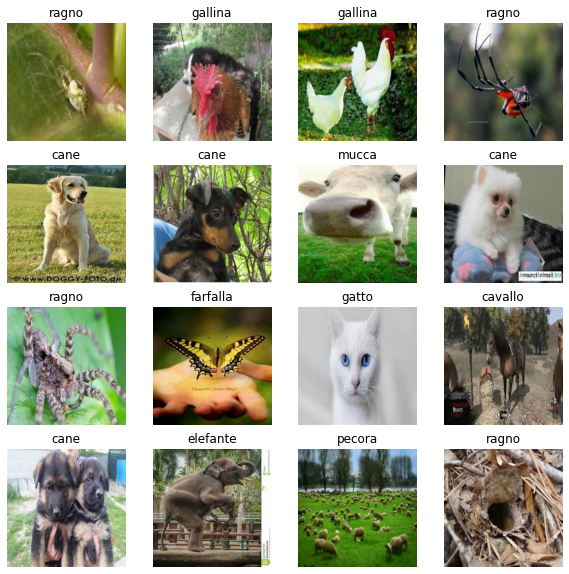

In [20]:
## visualize train set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(train[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_train[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

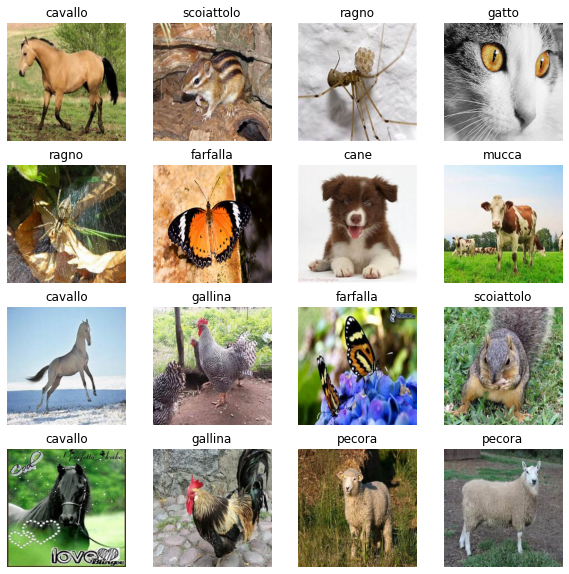

In [22]:
## visualize validation set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(val[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_val[i]
    name = LABELS[label] ## name of the animal class
    plt.title(name)
    plt.axis("off")


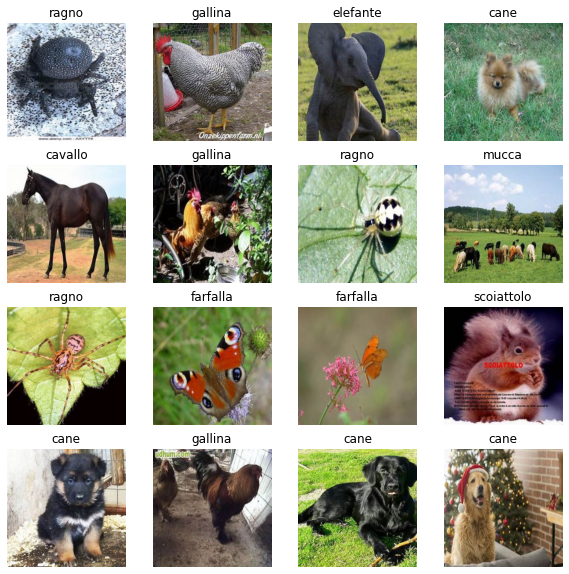

In [23]:
## visualize test set images

plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    ## in order for the image to be displayed in its real color 
    rgb = cv2.cvtColor(test[i], cv2.COLOR_BGR2RGB)
    plt.imshow(rgb, cmap = plt.cm.Spectral)
    #
    label = y_test[i]
    name = LABELS[label]
    plt.title(name)
    plt.axis("off")

In [24]:
## pre process the input images as required for the model 
train_processed = tf.keras.applications.resnet.preprocess_input(train)
#
val_processed = tf.keras.applications.resnet.preprocess_input(val)
#
test_processed = tf.keras.applications.resnet.preprocess_input(test)

2022-02-04 09:06:21.606505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-04 09:06:21.718744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-04 09:06:21.719489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-04 09:06:21.720659: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 25,696,138
Trainable params: 2,108,426
Non-trainable params: 23,587,712
_________________________________________________________________


2022-02-04 09:06:26.049400: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2022-02-04 09:06:26.163252: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2022-02-04 09:06:26.217919: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-02-04 09:06:29.771155: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
2022-02-04 09:06:37.059686: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 45158400 exceeds 10% of free system memory.
2022-02-04 09:06:37.238537: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 45158400 exceeds 10% of free system memory.


CPU times: user 41.3 s, sys: 3.84 s, total: 45.2 s
Wall time: 1min 54s
2/7 [=======>......................] - ETA: 0s - loss: 0.3177 - accuracy: 0.9688

2022-02-04 09:08:20.943071: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 30105600 exceeds 10% of free system memory.


7/7 [==============================] - 0s 48ms/step - loss: 0.5526 - accuracy: 0.9300
Test image accuracy :0.9300000071525574


2022-02-04 09:08:31.201669: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


              precision    recall  f1-score   support

        cane       0.88      0.90      0.89        40
     cavallo       0.84      0.76      0.80        21
    elefante       1.00      1.00      1.00         8
    farfalla       0.75      1.00      0.86        12
     gallina       0.96      0.96      0.96        25
       gatto       1.00      0.86      0.92        14
       mucca       0.62      0.89      0.73         9
      pecora       0.88      0.78      0.82         9
       ragno       1.00      0.90      0.95        40
  scoiattolo       0.91      0.91      0.91        22

    accuracy                           0.90       200
   macro avg       0.88      0.90      0.88       200
weighted avg       0.91      0.90      0.90       200



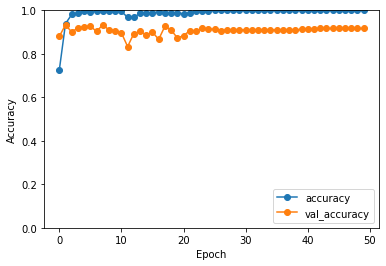

In [25]:
## Transfer learning with ResNet50. 
base_Net = tf.keras.applications.ResNet50(include_top = False, 
                         weights ='imagenet', 
                         input_shape = (224,224,3), 
                         pooling='avg',
                         )

base_Net.trainable = False
#Adding the final layers to the above base models where the actual classification is done in the dense layers
model_Net = tf.keras.models.Sequential()
model_Net.add(base_Net)
model_Net.add(tf.keras.layers.Dense(1024))
model_Net.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model_Net.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_Net.summary()

# Training the CNN on the Train data and evaluating it on the val data
%time history = model_Net.fit(train , y_train, validation_data = (val , y_val), epochs = 50, verbose = 0 )

##
test_loss, test_acc = model_Net.evaluate(test , y_test)
print("Test image accuracy :{}".format(test_acc))
##
plt.plot(history.history['accuracy'], '-o' ,label='accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
##
model_Net.save('vgg16')
##
test_predicted = model_Net.predict(test_processed)
##
predicted_label = []
for i in test_predicted:
    label =  np.argmax(i, axis = -1)
    predicted_label.append(label)
    
## classification report 
print(classification_report(y_test, predicted_label, target_names = LABELS))